In [1]:
from pdb import set_trace

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import gc4eptn
from gc4eptn import dataloaders
from gc4eptn.utils import norms
from gc4eptn.utils.utils import get_dataloader

%load_ext autoreload
%autoreload 2

In [2]:
# Data Params
dataset_type = 'rtds' # Selecte matpower or rtds
dataset_version = 'v5' # Select version based on type
load = 'high' # Select load based on dataset type
difficulty = 'intermediate' # Select data difficulty (e.g., novice, intermediate)
topology = 'complete' # (optional) set topology type (e.g., partial-left, complete)

In [3]:
ang_id, mag_id = 'ang', 'mag'
pmuds_kwargs = {}
if dataset_type == 'rtds':
    pmuds_kwargs = dict(load=load)
    time = 'Time'
elif dataset_type == 'matpower':
    pmuds_kwargs = dict(load=load)
    time = 'Load Scales'
else:
    raise ValueError(f"Data version {dataset_version} not supported.")
pmuds_class = get_dataloader(dataset_type, dataset_version, difficulty)
pmuds = pmuds_class(**pmuds_kwargs)
pmuds.load_data()
pmuds.df

,Time,BUS1_01_V_ang,BUS1_01_V_mag,BUS2_01_V_ang,BUS2_01_V_mag,BUS3_01_V_ang,BUS3_01_V_mag,BUS4_01_V_ang,BUS4_01_V_mag,BUS5_01_V_ang,...,BUS9_01_V_ang,BUS9_01_V_mag,BUS10_01_V_ang,BUS10_01_V_mag,BUS11_01_V_ang,BUS11_01_V_mag,BUS12_01_V_ang,BUS12_01_V_mag,BUS13_01_V_ang,BUS13_01_V_mag
0,0.0000,0.470849,11902.43848,0.300488,11671.10645,0,11902.49121,-0.177758,11671.20117,0.881667,...,0.081219,128984.5703,0.228098,130584.5859,0.407964,133896.1563,0.5589,127607.1406,0.081219,128984.5703
1,0.0333,0.470849,11902.42188,0.300488,11671.09375,0,11902.47754,-0.177758,11671.18750,0.881667,...,0.081219,128984.4219,0.228097,130584.4297,0.407964,133895.9844,0.5589,127606.9922,0.081219,128984.4219
2,0.0666,0.470849,11902.43262,0.300488,11671.10352,0,11902.48926,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391
3,0.0999,0.470849,11902.42480,0.300488,11671.09473,0,11902.47852,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228097,130584.4531,0.407964,133896.0156,0.5589,127607.0078,0.081219,128984.4375
4,0.1332,0.470849,11902.42871,0.300488,11671.09766,0,11902.48340,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,59.8401,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1798,59.8734,0.470849,11902.42773,0.300488,11671.09766,0,11902.48242,-0.177758,11671.19238,0.881667,...,0.081219,128984.4766,0.228098,130584.4922,0.407964,133896.0469,0.5589,127607.0469,0.081219,128984.4766
1799,59.9067,0.470849,11902.42383,0.300488,11671.09570,0,11902.47949,-0.177758,11671.18848,0.881667,...,0.081219,128984.4375,0.228098,130584.4531,0.407964,133896.0000,0.5589,127607.0078,0.081219,128984.4375
1800,59.9400,0.470849,11902.43359,0.300488,11671.10449,0,11902.48828,-0.177758,11671.19727,0.881667,...,0.081219,128984.5391,0.228098,130584.5547,0.407964,133896.1094,0.5589,127607.1094,0.081219,128984.5391


In [4]:
def get_plot_data(pmuds, time='Time', an='an', ma='ma'):
    an = [an] if not isinstance(an, list) else an
    ma = [ma] if not isinstance(ma, list) else ma
    
    nodes = list(pmuds.labels.values()) + [time]
    an_df = pmuds.df[pmuds.filter(pmuds.df, an+[time])]
    an_df.columns = nodes
    an_df = an_df.melt(id_vars=time)
    an_df['feature'] = 'ang'

    ma_df = pmuds.df[pmuds.filter(pmuds.df, ma+[time])]
    ma_df.columns = nodes
    ma_df = ma_df.melt(id_vars=time)
    ma_df['feature'] = 'mag'
    return pd.concat([an_df, an_df], ignore_index=True), ma_df, an_df

## Raw

In [5]:
pmuds.load_data()
plot_df, plot_ma_df, plot_an_df = get_plot_data(pmuds, time=time, an=ang_id, ma=mag_id)

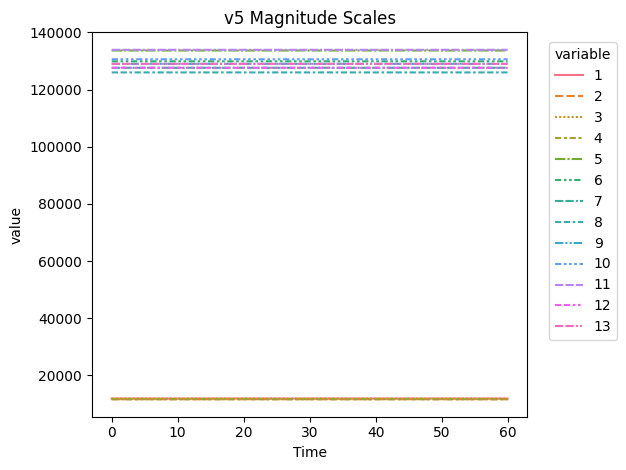

In [6]:
ax = sns.lineplot(plot_ma_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} Magnitude Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
plt.show()
# ax.figure.savefig('raw-ma-scales.pdf')

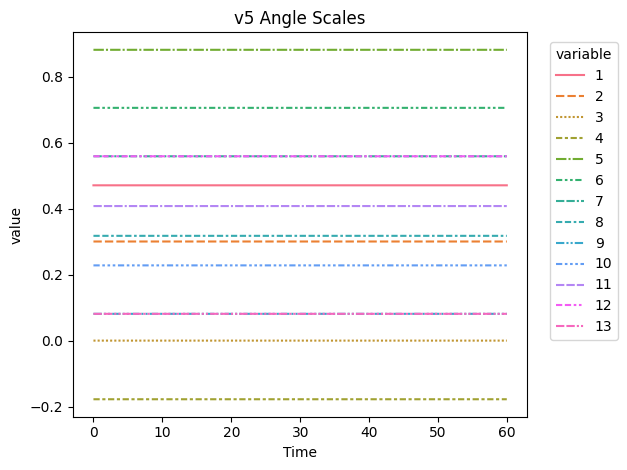

In [7]:
ax = sns.lineplot(plot_an_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} Angle Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
plt.show()
# ax.figure.savefig('raw-an-scales.pdf')

## Standardization

### Node-Wise

In [8]:
pmuds.load_data()
cols = pmuds.df.drop(time, axis=1).columns
pmuds.df[cols] = norms.standardize(pmuds.df[cols])
plot_df, plot_ma_df, plot_an_df = get_plot_data(pmuds, time=time, an=ang_id, ma=mag_id)

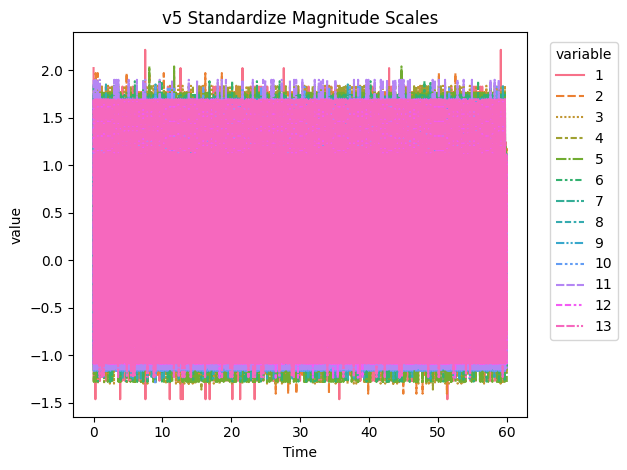

In [9]:
ax = sns.lineplot(plot_ma_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} Standardize Magnitude Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
# ax.figure.savefig('standardized-ma-scales.pdf')
plt.show()

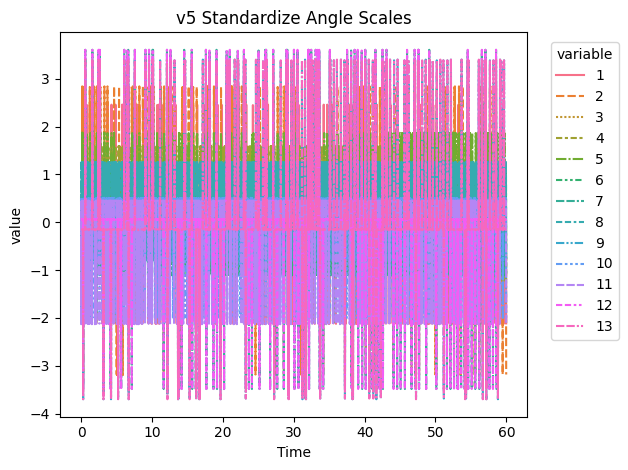

In [10]:
ax = sns.lineplot(plot_an_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} Standardize Angle Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
# ax.figure.savefig('standardized-an-scales.pdf')
plt.show()

### Feature-Wise

In [11]:
pmuds.load_data()
pmuds.df[cols] = norms.feature_norm(pmuds.df[cols],  norm_fn=norms.standardize, features=[ang_id, mag_id])


plot_df, plot_ma_df, plot_an_df = get_plot_data(pmuds, time=time, an=ang_id, ma=mag_id)

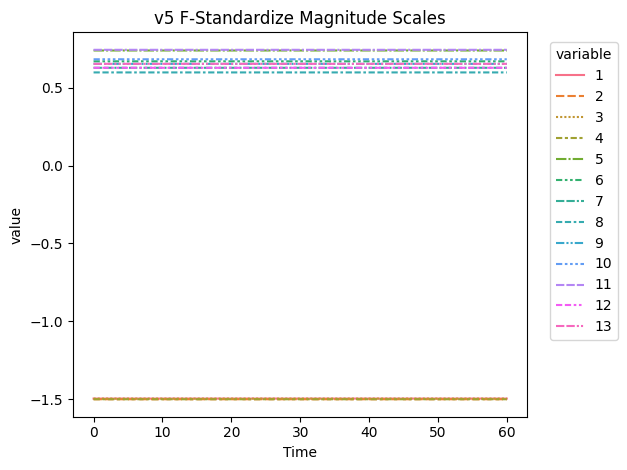

In [12]:
ax = sns.lineplot(plot_ma_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} F-Standardize Magnitude Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
# ax.figure.savefig('fstandardized-ma-scales.pdf')
plt.show()

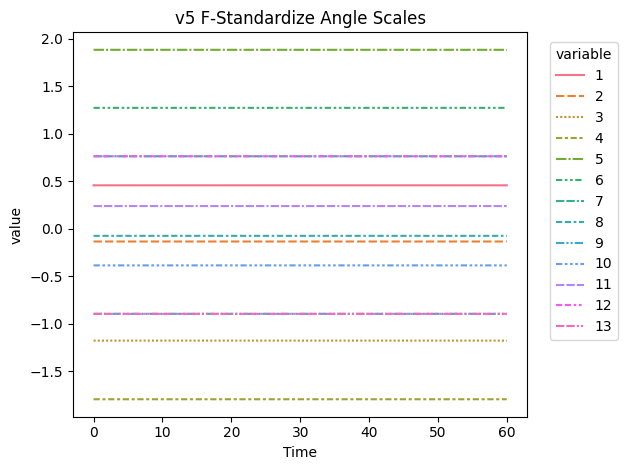

In [13]:
ax = sns.lineplot(plot_an_df, x=time, y='value', style='variable', hue='variable')
ax.set_title(f'{dataset_version} F-Standardize Angle Scales')
sns.move_legend(ax, [1.05, 0.20])
plt.tight_layout()
# ax.figure.savefig('fstandardized-an-scales.pdf')
plt.show()